✅ 成功加载新文件 hong_yu_hei_chapters_cleaned2.csv，总行数：31
--- 正在使用新数据计算全部人物情感得分... ---
✅ 人物情感得分计算完成。
✅ 图表范围限定在前 30 章，共 30 行数据。


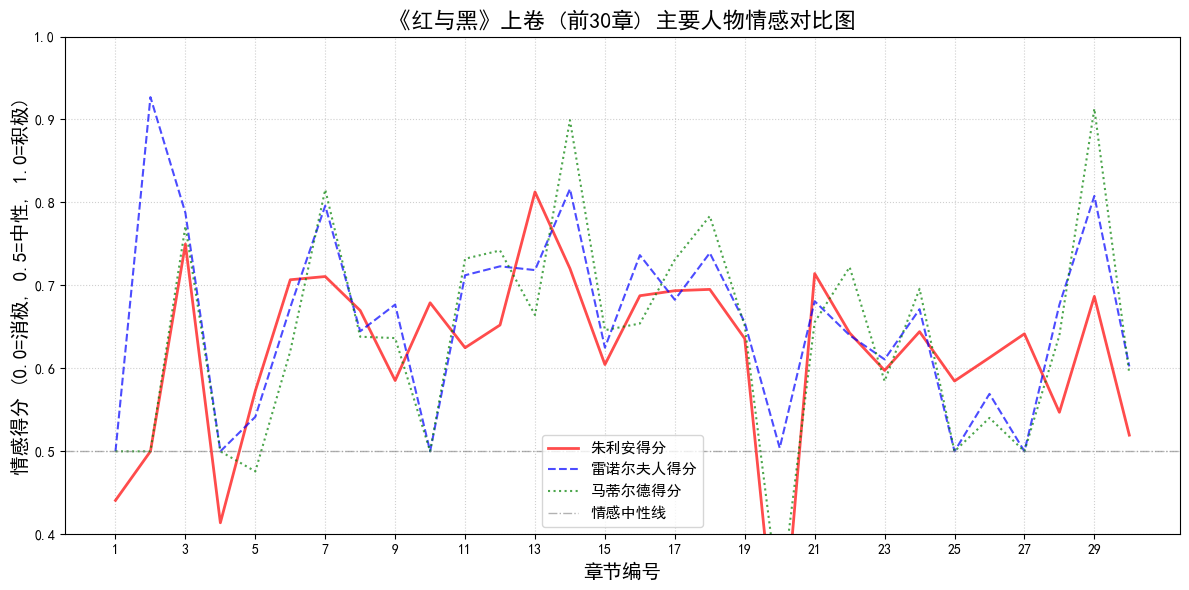

In [1]:
import pandas as pd
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import re
from collections import Counter

# --- A. 数据加载与预处理 ---
file_path = 'hong_yu_hei_chapters_cleaned2.csv' 
try:
    df_chapters = pd.read_csv(file_path, encoding='utf-8-sig')
    df_chapters['清洗后文本'] = df_chapters['清洗后文本'].astype(str).fillna('')
    print(f"✅ 成功加载新文件 {file_path}，总行数：{len(df_chapters)}")
except FileNotFoundError:
    print(f"❌ 错误：找不到文件 {file_path}。")
    exit()

# --- B. 情感计算函数定义 ---
PERSON_MAP = {
    'julien': ['朱利安', '索雷尔', '茹连', '于连'], 
    'madame_renal': ['雷诺尔夫人', '德雷纳尔夫人', '德瑞那夫人', '夫人', '她', '路易丝'],
    'mathilde': ['马蒂尔德', '玛蒂尔德', '小姐', '她', '德拉莫尔小姐']
}

def calculate_sentiment_score(text):
    if not text or text.strip() == '':
        return 0.5 
    try:
        s = SnowNLP(text)
        return s.sentiments
    except Exception:
        return 0.5

def get_person_sentiment(df, person_map):
    person_sentiment = {}
    for index, row in df.iterrows():
        chapter_num = row['章节编号']
        raw_text = row['清洗后文本']
        
        if raw_text.strip() == "":
             person_sentiment[chapter_num] = 0.5
             continue
        
        sentences = re.split(r'[。？！；]', raw_text)
        related_sentences = []
        
        for sentence in sentences:
            if any(p_name in sentence for p_name in person_map):
                related_sentences.append(sentence)
        
        if related_sentences:
            scores = [calculate_sentiment_score(s) for s in related_sentences]
            valid_scores = [s for s in scores if s != 0.5] 
            
            if valid_scores:
                avg_score = sum(valid_scores) / len(valid_scores)
            else:
                avg_score = 0.5
        else:
            avg_score = 0.5
            
        person_sentiment[chapter_num] = avg_score
        
    return pd.Series(person_sentiment)

# 重新计算情感得分 (确保使用新数据)
print("--- 正在使用新数据计算全部人物情感得分... ---")
df_chapters['朱利安得分'] = get_person_sentiment(df_chapters, PERSON_MAP['julien'])
df_chapters['雷诺尔夫人得分'] = get_person_sentiment(df_chapters, PERSON_MAP['madame_renal'])
df_chapters['马蒂尔德得分'] = get_person_sentiment(df_chapters, PERSON_MAP['mathilde'])
print("✅ 人物情感得分计算完成。")

# --- C. 筛选数据到前 30 章 ---
# 只保留章节编号 <= 30 的数据
df_shangjuan = df_chapters[df_chapters['章节编号'] <= 30].copy()
print(f"✅ 图表范围限定在前 30 章，共 {len(df_shangjuan)} 行数据。")


# --- D. 情感对比绘图 (限定范围) ---

# 1. 配置 Matplotlib 字体以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# 2. 创建图形和坐标轴
plt.figure(figsize=(12, 6))

# 3. 绘制上卷三条人物情感曲线
plt.plot(df_shangjuan['章节编号'], df_shangjuan['朱利安得分'], 
         label='朱利安得分', color='red', linewidth=2, alpha=0.7)
plt.plot(df_shangjuan['章节编号'], df_shangjuan['雷诺尔夫人得分'], 
         label='雷诺尔夫人得分', color='blue', linestyle='--', alpha=0.7)
# 由于马蒂尔德的主要戏份在下卷，上卷得分可能为中性线或无意义，我们仍绘制，但主要关注前两位。
plt.plot(df_shangjuan['章节编号'], df_shangjuan['马蒂尔德得分'], 
         label='马蒂尔德得分', color='green', linestyle=':', alpha=0.7)


# 4. 标记中性线 (0.5)
plt.axhline(y=0.5, color='gray', linestyle='-.', linewidth=1, alpha=0.6, label='情感中性线')

# 5. 设置图表属性
plt.title('《红与黑》上卷 (前30章) 主要人物情感对比图', fontsize=16)
plt.xlabel('章节编号', fontsize=14)
plt.ylabel('情感得分 (0.0=消极, 0.5=中性, 1.0=积极)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(0.4, 1.0) # 将Y轴范围调整为 0.4 到 1.0，以更好地展示情感波动
plt.xticks(range(1, 31, 2)) # 设置X轴刻度间隔

# 6. 显示图表 
plt.tight_layout()
plt.show()

✅ 加载数据完成，共 42 章
✅ 筛选下卷数据完成，有效章节数：12

✅ 图片导出成功！
📁 导出路径：D:\桌面\红与黑\红与黑下卷人物情感波动图.png
📏 分辨率：300 DPI
📊 文件大小：334.22 KB
✅ 文件验证通过：图片已存在且可访问


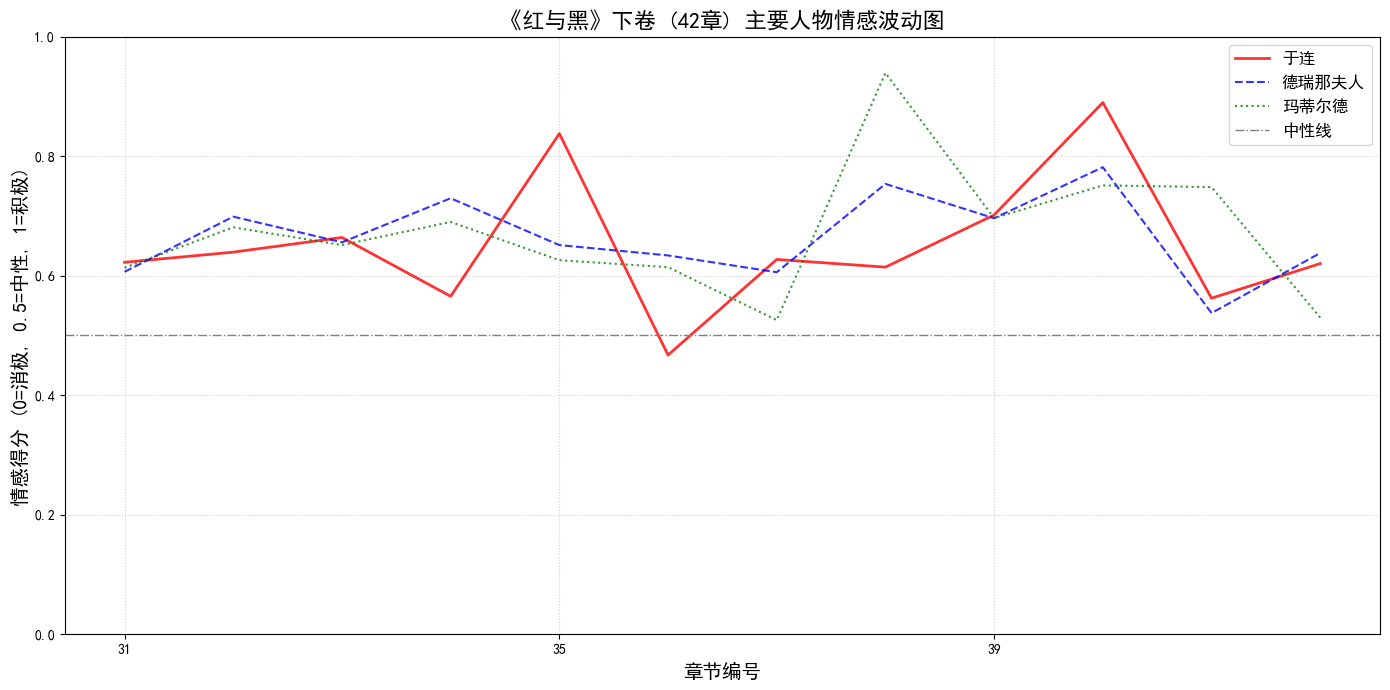


🎉 操作完成！已自动打开导出目录


In [2]:
import pandas as pd
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import re
import os  # 路径处理
import shutil  # 文件验证

# --- 核心配置：导出路径 + 格式 ---
EXPORT_DIR = r"D:\桌面\红与黑"  # 导出根目录
EXPORT_FORMAT = "png"  # 导出格式：png/jpg/svg可选
DPI = 300  # 导出分辨率（高清）
FIG_SIZE = (14, 7)  # 下卷图表尺寸

# --- A. 数据加载与预处理 ---
file_path = r"D:\桌面\红与黑\hong_yu_hei_chapters_cleaned3.csv"  

# 验证文件存在性
if not os.path.exists(file_path):
    print(f"❌ 源文件不存在：{file_path}")
    alt_paths = [
        r"D:\桌面\红与黑\hong_yu_hei_chapters_cleaned2.csv",
        r"D:\桌面\红与黑\hong_yu_hei_chapters_cleaned.csv"
    ]
    for alt in alt_paths:
        if os.path.exists(alt):
            file_path = alt
            print(f"⚠️ 切换至备用文件：{file_path}")
            break
    else:
        exit("❌ 无可用数据文件，终止运行")

# 加载数据
try:
    df_chapters = pd.read_csv(file_path, encoding='utf-8-sig')
    df_chapters['清洗后文本'] = df_chapters['清洗后文本'].astype(str).fillna('')
    df_chapters['章节编号'] = pd.to_numeric(df_chapters['章节编号'], errors='coerce').fillna(0)
    print(f"✅ 加载数据完成，共 {len(df_chapters)} 章")
except Exception as e:
    exit(f"❌ 加载数据失败：{str(e)}")

# --- B. 情感计算函数 ---
PERSON_MAP = {
    'julien': ['朱利安', '索雷尔', '茹连', '于连'], 
    'madame_renal': ['雷诺尔夫人', '德雷纳尔夫人', '德瑞那夫人', '夫人', '她', '路易丝'],
    'mathilde': ['马蒂尔德', '玛蒂尔德', '小姐', '她', '德拉莫尔小姐']
}

def calculate_sentiment_score(text):
    return SnowNLP(text).sentiments if text.strip() else 0.5

def get_person_sentiment(df, person_map):
    sentiment = {}
    for _, row in df.iterrows():
        chap = row['章节编号']
        sentences = re.split(r'[。？！；]', row['清洗后文本'])
        related = [s for s in sentences if any(p in s for p in person_map)]
        sentiment[chap] = sum(calculate_sentiment_score(s) for s in related)/len(related) if related else 0.5
    return pd.Series(sentiment)

# 计算情感得分
df_chapters['于连得分'] = get_person_sentiment(df_chapters, PERSON_MAP['julien'])
df_chapters['德瑞那夫人得分'] = get_person_sentiment(df_chapters, PERSON_MAP['madame_renal'])
df_chapters['玛蒂尔德得分'] = get_person_sentiment(df_chapters, PERSON_MAP['mathilde'])

# --- C. 筛选下卷数据（42章） ---
# 适配两种编号方式：31-72章 或 1-42章
df_xiajuan = df_chapters[(df_chapters['章节编号'] > 30) & (df_chapters['章节编号'] <= 72)].copy()
if len(df_xiajuan) == 0:
    df_xiajuan = df_chapters[df_chapters['章节编号'] <= 42].copy()
print(f"✅ 筛选下卷数据完成，有效章节数：{len(df_xiajuan)}")

# --- D. 绘图 + 强制导出图片 ---
# 1. 中文显示配置
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 创建图表
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=100)

# 3. 绘制曲线
ax.plot(df_xiajuan['章节编号'], df_xiajuan['于连得分'], 
        label='于连', color='red', linewidth=2, alpha=0.8)
ax.plot(df_xiajuan['章节编号'], df_xiajuan['德瑞那夫人得分'], 
        label='德瑞那夫人', color='blue', linestyle='--', alpha=0.8)
ax.plot(df_xiajuan['章节编号'], df_xiajuan['玛蒂尔德得分'], 
        label='玛蒂尔德', color='green', linestyle=':', alpha=0.8)

# 4. 样式美化
ax.axhline(y=0.5, color='gray', linestyle='-.', linewidth=1, label='中性线')
ax.set_title('《红与黑》下卷 (42章) 主要人物情感波动图', fontsize=16, fontweight='bold')
ax.set_xlabel('章节编号', fontsize=14)
ax.set_ylabel('情感得分 (0=消极, 0.5=中性, 1=积极)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_ylim(0, 1)
ax.set_xticks(range(min(df_xiajuan['章节编号']), max(df_xiajuan['章节编号'])+1, 4))

# --- E. 核心：图片导出逻辑（强化版） ---
# 创建导出目录（不存在则自动创建）
os.makedirs(EXPORT_DIR, exist_ok=True)

# 定义导出文件名
export_filename = f"红与黑下卷人物情感波动图.{EXPORT_FORMAT}"
export_path = os.path.join(EXPORT_DIR, export_filename)

# 强制保存图片（覆盖已有文件）
try:
    plt.tight_layout()
    plt.savefig(
        export_path,
        dpi=DPI,
        format=EXPORT_FORMAT,
        bbox_inches='tight',  # 裁剪空白
        pad_inches=0.1,       # 边距优化
        facecolor='white'     # 背景色
    )
    print(f"\n✅ 图片导出成功！")
    print(f"📁 导出路径：{export_path}")
    print(f"📏 分辨率：{DPI} DPI")
    print(f"📊 文件大小：{os.path.getsize(export_path)/1024:.2f} KB")
    
    # 验证文件是否可访问
    if os.path.exists(export_path):
        print("✅ 文件验证通过：图片已存在且可访问")
    else:
        print("❌ 文件验证失败：导出路径无文件")
        
except Exception as e:
    # 备用导出方案（桌面根目录）
    backup_path = os.path.join(r"D:\桌面", export_filename)
    plt.savefig(backup_path, dpi=DPI, format=EXPORT_FORMAT, bbox_inches='tight')
    print(f"\n⚠️ 主路径导出失败：{str(e)}")
    print(f"✅ 已备份导出至：{backup_path}")

# 显示图表
plt.show()
plt.close()  # 释放内存

# 可选：打开导出目录
os.startfile(EXPORT_DIR)
print("\n🎉 操作完成！已自动打开导出目录")